In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [62]:
# connect to a postgresql database

import psycopg2
from psycopg2.extras import RealDictCursor

host = 'lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com'
port = '5432'
user = 'lhl_student'
pwd = 'lhl_student'
database = 'mid_term_project'

conn = psycopg2.connect(host=host, port=port, user=user, password=pwd, database=database)
cur = conn.cursor(cursor_factory=RealDictCursor)



In [63]:
cur.execute("""select * from flights where carrier_delay is not null order by random() limit 50000;""")


In [64]:
flight_list = cur.fetchall()

In [65]:
flight_list = pd.DataFrame(flight_list)


In [66]:
flight_list.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-06,B6,B6,B6,333,B6,N992JB,333,10721,BOS,...,2704.0,0.0,0.0,22.0,0.0,0.0,None,NaN,NaN,None
1,2018-11-05,UA,UA,UA,257,UA,N62895,257,13204,MCO,...,1546.0,16.0,0.0,0.0,0.0,0.0,1620.0,10.0,10.0,None
2,2019-07-14,AA,AA,AA,1315,AA,N919NN,1315,12266,IAH,...,925.0,54.0,0.0,23.0,0.0,0.0,1747.0,15.0,15.0,None
3,2018-06-19,UA,UA_CODESHARE,UA,5607,OO,N118SY,5607,15380,TVC,...,224.0,0.0,0.0,55.0,0.0,10.0,None,NaN,NaN,None
4,2019-01-27,F9,F9,F9,2094,F9,N711FR,2094,12889,LAS,...,1371.0,28.0,0.0,0.0,0.0,21.0,None,NaN,NaN,None


In [47]:
# drop columns where Carrier_delay  Weather_delay NAS_delay  Security_delay  Late_aircraft_delay is null
flight_list = flight_list.dropna(subset=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])

In [67]:
# check if there is any null value
flight_list.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                   0
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                   0
dep_delay                  2
taxi_out                  14
wheels_off                14
wheels_on                 14
taxi_in                   14
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
cancellation_code      48164
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time        0
air_time                  14
flights                    0
distance                   0
carrier_delay              0
weather_delay 

In [68]:
# add new column to data frame for Total_delay = Carrier_delay + Weather_delay + NAS_delay + Security_delay + Late_aircraft_delay
flight_list['total_delay'] = flight_list['carrier_delay'] + flight_list['weather_delay'] + flight_list['nas_delay'] + flight_list['security_delay'] + flight_list['late_aircraft_delay']

In [66]:
#flight_list to csv
flight_list.to_csv('/Users/patrick/Desktop/flight_sample.csv')

In [35]:
from lets_plot import *
LetsPlot.setup_html()

In [69]:
df = flight_list

In [70]:
# Quantille quantille plot for total_delay
from statsmodels.graphics.gofplots import qqplot

ggplot(df, aes(x='total_delay')) + geom_qq2() + ggtitle("Quantile-quantile plot for total_delay")


In [85]:
from IPython.display import display
from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [87]:
# get unique values for origin_city_name
origin_city_name = df['origin_city_name'].unique()

In [93]:
# strip the state name from origin_city_name
origin_city_name = [x.split(',')[0] for x in origin_city_name]

In [97]:
# convert origin_city_name to tuple
origin_city_name = tuple(origin_city_name)

In [99]:
print (origin_city_name)

('Boston', 'Orlando', 'Houston', 'Traverse City', 'Las Vegas', 'Hartford', 'Phoenix', 'Raleigh/Durham', 'Chicago', 'Denver', 'Santa Ana', 'Ketchikan', 'New York', 'Washington', 'Madison', 'Indianapolis', 'Newark', 'Atlanta', 'Cincinnati', 'Fayetteville', 'Roanoke', 'Colorado Springs', 'Greensboro/High Point', 'Austin', 'San Francisco', 'Honolulu', 'Pittsburgh', 'Spokane', 'San Jose', 'Medford', 'Tampa', 'Aspen', 'St. Louis', 'Baltimore', 'Fort Lauderdale', 'New Orleans', 'San Antonio', 'Idaho Falls', 'Santa Fe', 'Charlotte', 'Nashville', 'Oakland', 'Salt Lake City', 'Detroit', 'New Haven', 'Kahului', 'Appleton', 'Jackson/Vicksburg', 'Little Rock', 'Jacksonville', 'Seattle', 'West Palm Beach/Palm Beach', 'Portland', 'Huntsville', 'Buffalo', 'Dallas/Fort Worth', 'Bristol/Johnson City/Kingsport', 'Los Angeles', 'Fargo', 'Richmond', 'Jacksonville/Camp Lejeune', 'Rapid City', 'Rochester', 'Milwaukee', 'South Bend', 'Baton Rouge', 'Fort Myers', 'Louisville', 'Greer', 'Albuquerque', 'Toledo',

In [104]:
# total_delay by origin_city_name
cities  = geocode_cities(origin_city_name).where (name = origin_city_name, scope = 'US').get_boundaries(5)
display(cities)
ggplot() + geom_map(aes(fill='total_delay'), data=cities, tooltips=layer_tooltips().line('@origin_city_name: @total_delay')) + ggsize(900, 600)

ValueError: ('Boston', 'Orlando', 'Houston', 'Traverse City', 'Las Vegas', 'Hartford', 'Phoenix', 'Raleigh/Durham', 'Chicago', 'Denver', 'Santa Ana', 'Ketchikan', 'New York', 'Washington', 'Madison', 'Indianapolis', 'Newark', 'Atlanta', 'Cincinnati', 'Fayetteville', 'Roanoke', 'Colorado Springs', 'Greensboro/High Point', 'Austin', 'San Francisco', 'Honolulu', 'Pittsburgh', 'Spokane', 'San Jose', 'Medford', 'Tampa', 'Aspen', 'St. Louis', 'Baltimore', 'Fort Lauderdale', 'New Orleans', 'San Antonio', 'Idaho Falls', 'Santa Fe', 'Charlotte', 'Nashville', 'Oakland', 'Salt Lake City', 'Detroit', 'New Haven', 'Kahului', 'Appleton', 'Jackson/Vicksburg', 'Little Rock', 'Jacksonville', 'Seattle', 'West Palm Beach/Palm Beach', 'Portland', 'Huntsville', 'Buffalo', 'Dallas/Fort Worth', 'Bristol/Johnson City/Kingsport', 'Los Angeles', 'Fargo', 'Richmond', 'Jacksonville/Camp Lejeune', 'Rapid City', 'Rochester', 'Milwaukee', 'South Bend', 'Baton Rouge', 'Fort Myers', 'Louisville', 'Greer', 'Albuquerque', 'Toledo', 'Ontario', 'Sioux Falls', 'San Diego', 'Minneapolis', 'Philadelphia', 'Dallas', 'Kansas City', 'Boise', 'Pensacola', 'Rockford', 'Tucson', 'Columbus', 'Cleveland', 'Kalispell', 'Portland', 'Sacramento', 'Knoxville', 'San Juan', 'Champaign/Urbana', 'El Paso', 'Memphis', 'Minot', 'Providence', 'Long Beach', 'Bozeman', 'Midland/Odessa', 'Palm Springs', 'Charleston', 'Wenatchee', 'Springfield', 'Santa Barbara', 'Grand Junction', 'Columbia', 'Lexington', 'Eagle', 'Islip', 'Cedar Rapids/Iowa City', 'Newport News/Williamsburg', 'Des Moines', 'Birmingham', 'Wichita', 'White Plains', 'Burbank', 'Evansville', 'Monroe', 'Joplin', 'Wilmington', 'St. Petersburg', 'Norfolk', 'Santa Rosa', 'Tulsa', 'Jackson', 'Montrose/Delta', 'Miami', 'Fresno', 'Laredo', 'Myrtle Beach', 'Savannah', 'Hibbing', 'Sarasota/Bradenton', 'Valparaiso', 'Greenville', 'Wichita Falls', 'Arcata/Eureka', 'Corpus Christi', 'Kona', 'Peoria', 'Albany', 'Bismarck/Mandan', 'Tallahassee', 'Plattsburgh', 'Salina', 'Great Falls', 'Mission/McAllen/Edinburg', 'Key West', 'Bend/Redmond', 'Green Bay', 'Mobile', 'Omaha', 'Amarillo', 'Rhinelander', 'Kalamazoo', 'Rochester', 'Burlington', 'Grand Rapids', 'Flint', 'Dayton', 'Sanford', 'Lihue', 'Juneau', 'Lincoln', 'Fayetteville', 'Montgomery', 'Charlottesville', 'Lansing', 'Anchorage', 'Syracuse', 'Punta Gorda', 'Bakersfield', 'Oklahoma City', 'Reno', 'Helena', 'Newburgh/Poughkeepsie', 'Clarksburg/Fairmont', 'Bloomington/Normal', 'Bangor', 'Allentown/Bethlehem/Easton', 'Binghamton', 'West Yellowstone', 'Harrisburg', 'Augusta', 'Ashland', 'Kapalua', 'Hays', 'Akron', 'Daytona Beach', 'Killeen', 'Lubbock', 'Provo', 'Panama City', 'Charlotte Amalie', 'Lafayette', 'Ithaca/Cortland', 'San Angelo', 'Sault Ste. Marie', 'Harlingen/San Benito', 'Yakima', 'Texarkana', 'Shreveport', 'Monterey', 'Everett', 'Alexandria', 'Scranton/Wilkes-Barre', 'Hilo', 'Bellingham', 'Williston', 'Pueblo', 'Grand Forks', 'Sun Valley/Hailey/Ketchum', 'Hoolehua', 'Chattanooga', 'Gunnison', 'Dothan', 'State College', 'Durango', 'Yuma', 'Brownsville', 'Gainesville', 'Duluth', 'Muskegon', 'San Luis Obispo', 'Mosinee', 'Worcester', 'Abilene', 'Moline', 'Pasco/Kennewick/Richland', 'Gulfport/Biloxi', 'Asheville', 'Kearney', 'Manchester', 'Guam', 'Casper', 'Flagstaff', 'Moab', 'Charleston/Dunbar', 'Fort Wayne', 'Stockton', 'Cordova', 'Trenton', 'La Crosse', 'Mammoth Lakes', 'Florence', 'Eugene', 'Fairbanks', 'Garden City', 'Missoula', 'Fort Smith', 'Billings', 'Nantucket', 'Cody', 'Lake Charles', 'Stillwater', 'Salisbury', 'Columbia', 'Pullman', "Martha's Vineyard", 'Aguadilla', 'Wrangell', 'Hagerstown', 'Escanaba', 'Watertown', 'Pocatello', 'Cedar City', 'Vernal', 'Saginaw/Bay City/Midland', 'Belleville', 'Waco', 'Unalaska', 'Prescott', 'Concord', 'New Bern/Morehead/Beaufort', 'Dubuque', 'Lewisburg', 'Niagara Falls', 'Laramie', 'Christiansted', 'Columbus', 'Manhattan/Ft. Riley', 'Quincy', 'Saipan', 'Lanai', 'Staunton', 'Bethel', 'Sioux City', 'Lynchburg', 'Springfield', 'Dickinson', 'Elmira/Corning', 'Presque Isle/Houlton', 'Latrobe', 'Roswell', 'Cheyenne', 'Redding', 'Lewiston', 'Brunswick', 'College Station/Bryan', 'Grand Island', 'Atlantic City', 'Melbourne', 'Hilton Head', 'Devils Lake', 'Sitka', 'Aberdeen', 'Kodiak', 'Albany', 'Pierre', 'Deadhorse', 'Iron Mountain/Kingsfd', 'Ponce', 'Walla Walla', 'St. Cloud', 'Alpena', 'Kotzebue', 'Santa Maria', 'Tyler', 'Butte', 'Jamestown', 'Paducah', 'Meridian', 'Longview', 'Lawton/Fort Sill', 'Pellston', 'Gillette', 'Rock Springs', 'Bemidji', 'Erie', 'Liberal', 'Twin Falls', 'Hayden', 'Williamsport', 'Hancock/Houghton', 'Cape Girardeau', 'St. George', 'Beaumont/Port Arthur', 'Yakutat', 'Columbus', 'Watertown', 'Owensboro', 'Del Rio', 'Marquette', 'North Platte', 'Valdosta', 'Eau Claire', 'Scottsbluff', 'North Bend/Coos Bay', 'Adak Island', 'Elko', 'Portsmouth', 'Barrow', 'Hattiesburg/Laurel', 'Brainerd', 'Hobbs', 'International Falls') is not found in names

In [53]:
df.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_add_gtime,longest_add_gtime,total_delay
count,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,...,1848.0,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,54.000000,54.000000,1848.000000
mean,2795.077922,2795.077922,12705.211039,12692.686688,1457.597403,1517.919913,62.313853,23.823593,1541.462121,1543.056818,...,1.0,777.127706,20.777597,3.150433,15.970238,0.048701,27.069805,34.111111,33.759259,67.016775
std,1863.980523,1863.980523,1486.298310,1513.785208,463.399142,497.646771,90.479706,16.947137,506.556132,622.367203,...,0.0,573.867982,63.828816,22.819460,44.497710,0.895037,52.981083,29.285624,29.303188,87.255701
min,1.000000,1.000000,10135.000000,10135.000000,55.000000,1.000000,-12.000000,4.000000,3.000000,1.000000,...,1.0,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
25%,1207.250000,1207.250000,11292.000000,11292.000000,1105.000000,1148.000000,18.000000,13.000000,1204.000000,1215.500000,...,1.0,362.750000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,17.000000,24.000000
50%,2322.000000,2322.000000,12889.000000,12889.000000,1516.500000,1557.000000,40.000000,18.000000,1616.000000,1702.500000,...,1.0,625.500000,0.000000,0.000000,3.000000,0.000000,2.000000,27.000000,26.000000,40.000000
75%,4415.250000,4415.250000,14057.000000,14034.500000,1827.250000,1919.000000,80.000000,30.000000,1937.000000,2031.000000,...,1.0,1011.500000,18.000000,0.000000,19.000000,0.000000,33.000000,39.750000,38.250000,80.000000
max,9375.000000,9375.000000,16218.000000,15919.000000,2359.000000,2400.000000,1252.000000,143.000000,2400.000000,2359.000000,...,1.0,3801.000000,1147.000000,730.000000,1045.000000,23.000000,829.000000,145.000000,145.000000,1248.000000


In [38]:
# drop rows where Carrier_delay Weather_delay NAS_delay Security_delay Late_aircraft_delay are null
df = df.dropna(subset=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])

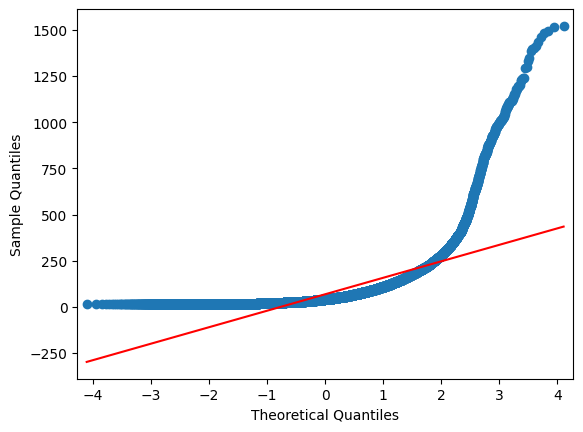

In [72]:
from statsmodels.graphics.gofplots import qqplot
#select only the total_delay column values from the dataframe
data = df['total_delay']
# Quantille quantille plot for total_delay
qqplot(data, line='s')
plt.show()

In [25]:
df.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_add_gtime,longest_add_gtime,total_delay
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4423.000000,4422.000000,4419.000000,4419.000000,4418.000000,...,4500.0,4500.000000,832.000000,832.000000,832.000000,832.000000,832.000000,28.000000,28.000000,832.000000
mean,2730.430889,2729.810222,12661.972667,12678.557556,1327.027778,1331.678725,10.367028,17.638606,1353.512107,1459.655727,...,1.0,769.706444,18.804087,3.266827,17.375000,0.045673,29.322115,46.964286,46.214286,68.813702
std,1863.574128,1862.923293,1511.872143,1531.127098,490.110591,504.097311,45.853941,10.317129,506.960606,533.175427,...,0.0,584.748620,55.050169,22.316150,48.754215,0.890020,50.342171,45.603348,44.744010,83.287492
min,1.000000,1.000000,10135.000000,10135.000000,5.000000,1.000000,-25.000000,2.000000,1.000000,1.000000,...,1.0,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,15.000000
25%,1105.750000,1105.750000,11292.000000,11292.000000,908.750000,909.000000,-6.000000,12.000000,925.000000,1045.000000,...,1.0,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.750000,15.750000,25.000000
50%,2321.500000,2321.500000,12889.000000,12889.000000,1310.000000,1316.000000,-2.000000,15.000000,1328.000000,1452.000000,...,1.0,605.000000,1.000000,0.000000,2.000000,0.000000,7.000000,23.000000,23.000000,40.000000
75%,4309.250000,4308.250000,14027.000000,14057.000000,1740.000000,1747.000000,6.000000,20.000000,1801.000000,1913.750000,...,1.0,1009.000000,19.000000,0.000000,20.000000,0.000000,36.000000,65.500000,65.000000,81.000000
max,7435.000000,7435.000000,16101.000000,16101.000000,2359.000000,2359.000000,1050.000000,147.000000,2400.000000,2400.000000,...,1.0,4502.000000,982.000000,375.000000,1039.000000,20.000000,429.000000,153.000000,153.000000,1039.000000


In [73]:
# shapiro wilk test for normality
from scipy.stats import shapiro
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.10f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.523, p=0.0000000000
Sample does not look Gaussian (reject H0)


/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [105]:
# histogram for total_delay
ggplot(df, aes(x='total_delay')) + geom_histogram(binwidth=35, color='black', fill='white') + ggtitle("Histogram for total_delay") + xlab("total_delay") + ylab("Count")

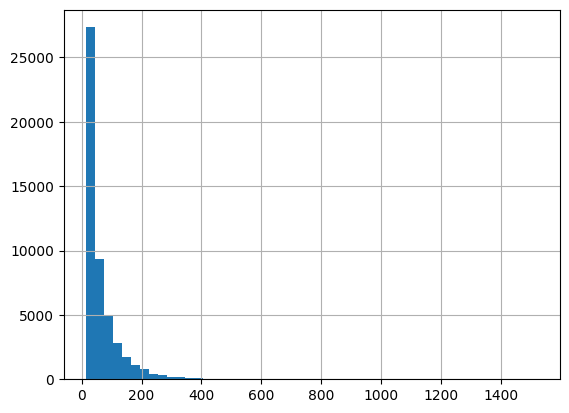

In [76]:
df['total_delay'].describe()
df['total_delay'].hist(bins=50)
plt.show()

In [81]:
# test the hypothesis that Total_delay is normally distributed
# H0: Total_delay is normally distributed
# H1: Total_delay is not normally distributed

# Shapiro-Wilk Test
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt

def test_shapiro_wilk():
    stat, p = shapiro(df['arr_delay'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('p=%.3f, alpha=%.3f' % (p, alpha))
        # plot
        plt.hist(df['arr_delay'])
        plt.show()
        plt.hist(df['arr_delay'], bins=100)
        plt.show()

Statistics=0.523, p=0.000
Sample does not look Gaussian (reject H0)
p=0.000, alpha=0.050


/Users/patrick/opt/anaconda3/envs/Python_3_9/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


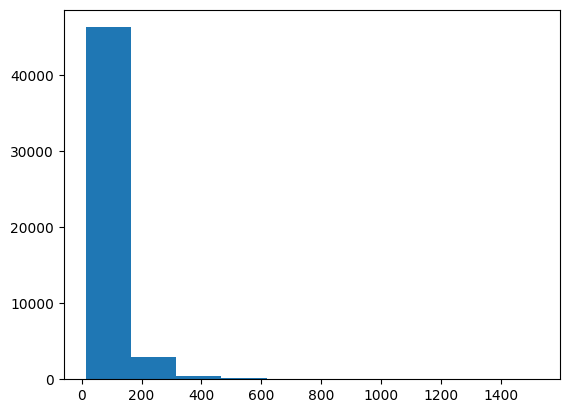

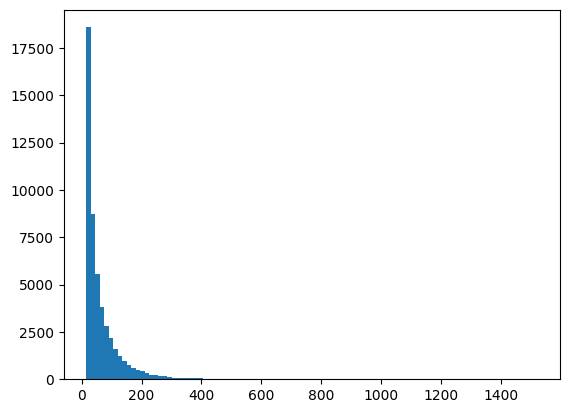

In [82]:
test_shapiro_wilk()

In [80]:
# ggplot of shapiro-wilk test
mean = df['total_delay'].mean()
quantiles = {'..quantile..': [0.25, 0.5, 0.75]}
ggplot(df, aes(x='total_delay'))\
    + geom_density(color = 'yellow',size = 1, quantiles = [0.25, 0.5, 0.75]) + \
    theme_classic() + \
    flavor_high_contrast_dark() + \
    geom_vline(xintercept=mean, color='red', size = 0.5)